# Data Preprocessing for Covid19 Cases in Baangladesh Divisionwise
Data preprocessing for creating analytical dashboard and ML model building

### Dataset - [Covid19 Cases in Bangladesh dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/covid19-cases-in-bangladesh-dataset) From Kaggle

### Libraries
1. Numpy
2. Pandas
3. Matplotlib
4. Seaborn
5. Sci-kit Learn

# Tasks
- import modules
- Read DataSet
- Sanity Check
    - Formatting column names
    - Remove duplicates
    - datatype handling
- Exploratory Data Analysis
    - Histogram
    - Boxplot
    - Scatterplot
    - Heatmap
- Handling Missing Values
    - Fill missing value with 0
    - Interpolation Methods
- Handling Outliers

## Importing libraries

In [1]:
# Import libraries
from pathlib import Path
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
# create a Path object to represent the file path
filepath = Path(r"../files/covid_dataset.csv")

covid = pd.read_csv(filepath)

### Dataset loading confirmation

In [3]:
# check data
covid.head()

,Date,Confirmed cases Barisal,Case rate Barisal,Deaths Barisal,Death Rate Barisal,Confirmed cases CTG,Case rate CTG,Deaths CTG,Death Rate CTG,Confirmed cases DHK,...,Deaths Rangpur,Death Rate Rangpur,Confirmed cases Sylhet,Case rate Sylhet,Deaths Sylhet,Death Rate Sylhet,Confirmed cases allover Bangladesh,Case rate allover Bangladesh,Deaths allover Bangladesh,Death Rate allover Bangladesh
0,Mar-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mar-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mar-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mar-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(covid.columns)

37

In [5]:
# data shape
print("Shape of the Covid19 Dataset:", covid.shape)

Shape of the Covid19 Dataset: (489, 37)


# Understand Dataset

In [6]:
# Overview of the dataset
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                489 non-null    object 
 1   Confirmed cases Barisal             447 non-null    float64
 2   Case rate Barisal                   447 non-null    float64
 3   Deaths Barisal                      461 non-null    float64
 4   Death Rate Barisal                  461 non-null    float64
 5   Confirmed cases CTG                 453 non-null    float64
 6   Case rate CTG                       453 non-null    float64
 7   Deaths CTG                          461 non-null    float64
 8   Death Rate CTG                      461 non-null    float64
 9   Confirmed cases DHK                 464 non-null    float64
 10  Case rate DHK                       464 non-null    float64
 11  Deaths DHK                          461 non-n

In [7]:
# dataset description
covid.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Confirmed cases Barisal,447.0,45.785235,40.410211,1.0,12.50,33.0,72.50,202.0
Case rate Barisal,447.0,14.232662,10.911158,1.0,6.00,11.0,21.00,73.0
Deaths Barisal,461.0,32.056399,23.015332,1.0,16.00,30.0,39.00,143.0
Death Rate Barisal,461.0,2.173319,2.751546,0.0,1.20,1.6,2.30,33.3
Confirmed cases CTG,453.0,277.686534,222.340693,1.0,122.00,214.0,383.00,1311.0
Case rate CTG,453.0,12.097130,9.533560,1.0,5.00,9.0,17.00,85.0
Deaths CTG,461.0,32.056399,23.015332,1.0,16.00,30.0,39.00,143.0
Death Rate CTG,461.0,2.173319,2.751546,0.0,1.20,1.6,2.30,33.3
Confirmed cases DHK,464.0,955.428879,870.037689,1.0,372.50,832.5,1192.75,5178.0
Case rate DHK,464.0,20.002155,15.986563,3.0,11.00,17.0,24.00,100.0


# Sanity Check
- Standardizing Columns Name
- Proper Date Format for Visualization
- Data Type Handling
- Remove Duplicate
- Check Missing Values

## Column Name Standardization
   - **TO DO:** Abbreviation to full name
   - **TO DO:** Remove extra spaces
   - **TO DO:** Make each word a title

In [ ]:
# columns review
covid.columns

Index(['Date', 'Confirmed cases Barisal', 'Case rate Barisal',
       'Deaths Barisal', 'Death Rate Barisal', 'Confirmed cases CTG',
       'Case rate CTG', 'Deaths CTG', 'Death Rate CTG', 'Confirmed cases DHK',
       'Case rate DHK', 'Deaths DHK', 'Death Rate DHK',
       'Confirmed cases Khulna', 'Case rate Khulna', 'Deaths Khulna',
       'Death Rate Khulna', 'Confirmed cases MMsingh', 'Case rate MMsingh',
       'Deaths MMsingh', 'Death Rate MMsingh', 'Confirmed cases Rajshahi',
       'Case rate Rajshahi', 'Deaths Rajshahi', 'Death Rate Rajshahi',
       'Confirmed cases Rangpur', 'Case rate Rangpur', 'Deaths Rangpur',
       'Death Rate Rangpur', 'Confirmed cases Sylhet', 'Case rate Sylhet',
       'Deaths Sylhet', 'Death Rate Sylhet',
       'Confirmed cases allover Bangladesh', 'Case rate allover Bangladesh',
       'Deaths allover Bangladesh', 'Death Rate allover Bangladesh'],
      dtype='object')

In [ ]:
# Task: Standardize Column Names
# TO DO: Abbreviation to Full Form
# TO DO: Remove Exatra Spaces From Column Name
covid.columns = covid.columns.str.replace(r'CTG\b|DHK\b|MMsingh\b|\s{2, }', lambda x: {
                                             'CTG' : "Chittagong",
                                             'DHK' : "Dhaka",
                                             'MMsingh':  "Mymensingh",
                                             '\s{2, }': " "
                                         }[x.group()], regex=True).str.title()

In [ ]:
# verify column names
covid.columns

Index(['Date', 'Confirmed Cases Barisal', 'Case Rate Barisal',
       'Deaths Barisal', 'Death Rate Barisal', 'Confirmed Cases Chittagong',
       'Case Rate Chittagong', 'Deaths Chittagong', 'Death Rate Chittagong',
       'Confirmed Cases Dhaka', 'Case Rate Dhaka', 'Deaths Dhaka',
       'Death Rate Dhaka', 'Confirmed Cases Khulna', 'Case Rate Khulna',
       'Deaths Khulna', 'Death Rate Khulna', 'Confirmed Cases Mymensingh',
       'Case Rate Mymensingh', 'Deaths Mymensingh', 'Death Rate Mymensingh',
       'Confirmed Cases Rajshahi', 'Case Rate Rajshahi', 'Deaths Rajshahi',
       'Death Rate Rajshahi', 'Confirmed Cases Rangpur', 'Case Rate Rangpur',
       'Deaths Rangpur', 'Death Rate Rangpur', 'Confirmed Cases Sylhet',
       'Case Rate Sylhet', 'Deaths Sylhet', 'Death Rate Sylhet',
       'Confirmed Cases Allover Bangladesh', 'Case Rate Allover Bangladesh',
       'Deaths Allover Bangladesh', 'Death Rate Allover Bangladesh'],
      dtype='object')

## Proper Date Format

In [8]:
# convert "Date" column to datetime
# TO DO : Parse month-year with a placeholder day (01)
# TO DO : Create sequential day number within each month-year group
# TO DO : Construct actual date by adding the offset
# TO DO : Remove the temporary columns


# parse month-year and store it in BaseDate column
covid['BaseDate'] = pd.to_datetime(covid['Date'].str.strip(), format='%b-%y', errors='coerce')

# create sequential day number within the month-year group and store it in DayOffset column
covid['DayOffset'] = covid.groupby('BaseDate').cumcount()

# Actual date by adading the date offset
covid['Date'] = covid['BaseDate'] + pd.to_timedelta(covid['DayOffset'], unit='D')

# drop temporary columns
covid.drop(columns=['BaseDate', 'DayOffset'], inplace=True)

In [9]:
# verify date column
covid['Date']

0     2020-03-01
1     2020-03-02
2     2020-03-03
3     2020-03-04
4     2020-03-05
         ...    
484   2021-06-28
485   2021-06-29
486   2021-06-30
487   2021-07-01
488   2021-07-02
Name: Date, Length: 489, dtype: datetime64[ns]

## Data Type Handling

In [10]:
# quick overview of the dataset
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                489 non-null    datetime64[ns]
 1   Confirmed cases Barisal             447 non-null    float64       
 2   Case rate Barisal                   447 non-null    float64       
 3   Deaths Barisal                      461 non-null    float64       
 4   Death Rate Barisal                  461 non-null    float64       
 5   Confirmed cases CTG                 453 non-null    float64       
 6   Case rate CTG                       453 non-null    float64       
 7   Deaths CTG                          461 non-null    float64       
 8   Death Rate CTG                      461 non-null    float64       
 9   Confirmed cases DHK                 464 non-null    float64       
 10  Case rate DHK             

In [11]:
# function to fix data type of the columns
def fix_dtype(col_name, series):
    if "Rate" in col_name or col_name == covid.columns[0]:
        return series
    else:
        return pd.to_numeric(series, errors='coerce').astype('Int64')

In [12]:
# verify and change column dtype
for col in covid.columns:
    covid[col] = fix_dtype(col, covid[col])

**NOTE:** NaN is a float, and pandas cannot convert NaN to int64, hence a ValueError will raise. Either we can change the data type after converting the NaN to Numeric values or use Int64 (with capital I) — the pandas nullable integer type that supports NaN

In [13]:
# verify data types
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                489 non-null    datetime64[ns]
 1   Confirmed cases Barisal             447 non-null    Int64         
 2   Case rate Barisal                   447 non-null    Int64         
 3   Deaths Barisal                      461 non-null    Int64         
 4   Death Rate Barisal                  461 non-null    float64       
 5   Confirmed cases CTG                 453 non-null    Int64         
 6   Case rate CTG                       453 non-null    Int64         
 7   Deaths CTG                          461 non-null    Int64         
 8   Death Rate CTG                      461 non-null    float64       
 9   Confirmed cases DHK                 464 non-null    Int64         
 10  Case rate DHK             

## Remove Duplicates
   - **TO DO** : Check Duplicate Rows
   - **TO DO** : Duplicate Count
   - **TO DO** : Drop Duplicates (If Any)

In [14]:
# duplicate rows
covid.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
484    False
485    False
486    False
487    False
488    False
Length: 489, dtype: bool

In [15]:
# duplicates count
covid.duplicated().sum()

np.int64(0)

## Missing Values

In [19]:
# checking columns that has NaN values
covid.isnull().sum()

Date                                   0
Confirmed Cases Barisal               42
Case Rate Barisal                     42
Deaths Barisal                        28
Death Rate Barisal                    28
Confirmed Cases Chittagong            36
Case Rate Chittagong                  36
Deaths Chittagong                     28
Death Rate Chittagong                 28
Confirmed Cases Dhaka                 25
Case Rate Dhaka                       25
Deaths Dhaka                          28
Death Rate Dhaka                      28
Confirmed Cases Khulna                44
Case Rate Khulna                      44
Deaths Khulna                         28
Death Rate Khulna                     28
Confirmed Cases Mymensingh            39
Case Rate Mymensingh                  39
Deaths Mymensingh                     28
Death Rate Mymensingh                 28
Confirmed Cases Rajshahi              44
Case Rate Rajshahi                    44
Deaths Rajshahi                       28
Death Rate Rajsh

In [20]:
# missing value percentage
covid.isnull().sum() / covid.shape[0] * 100

Date                                  0.000000
Confirmed Cases Barisal               8.588957
Case Rate Barisal                     8.588957
Deaths Barisal                        5.725971
Death Rate Barisal                    5.725971
Confirmed Cases Chittagong            7.361963
Case Rate Chittagong                  7.361963
Deaths Chittagong                     5.725971
Death Rate Chittagong                 5.725971
Confirmed Cases Dhaka                 5.112474
Case Rate Dhaka                       5.112474
Deaths Dhaka                          5.725971
Death Rate Dhaka                      5.725971
Confirmed Cases Khulna                8.997955
Case Rate Khulna                      8.997955
Deaths Khulna                         5.725971
Death Rate Khulna                     5.725971
Confirmed Cases Mymensingh            7.975460
Case Rate Mymensingh                  7.975460
Deaths Mymensingh                     5.725971
Death Rate Mymensingh                 5.725971
Confirmed Cas

In [21]:
# Filtering Not NaN rows
# returns True for rows where at least one non-date column is not NaN.
covid[covid.drop(columns='Date').notna().any(axis=1)].head()

,Date,Confirmed Cases Barisal,Case Rate Barisal,Deaths Barisal,Death Rate Barisal,Confirmed Cases Chittagong,Case Rate Chittagong,Deaths Chittagong,Death Rate Chittagong,Confirmed Cases Dhaka,...,Deaths Rangpur,Death Rate Rangpur,Confirmed Cases Sylhet,Case Rate Sylhet,Deaths Sylhet,Death Rate Sylhet,Confirmed Cases Allover Bangladesh,Case Rate Allover Bangladesh,Deaths Allover Bangladesh,Death Rate Allover Bangladesh
5,2020-03-06,1,7,<NA>,NaN,<NA>,<NA>,<NA>,NaN,3,...,<NA>,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,NaN
7,2020-03-08,1,13,<NA>,NaN,1,50,<NA>,NaN,55,...,<NA>,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,NaN
8,2020-03-09,<NA>,<NA>,<NA>,NaN,2,33,<NA>,NaN,<NA>,...,<NA>,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,NaN
17,2020-03-18,<NA>,<NA>,1,25.0,<NA>,<NA>,1,25.0,<NA>,...,1,25.0,<NA>,<NA>,1,25.0,<NA>,<NA>,1,25.0
18,2020-03-19,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,NaN,1,...,<NA>,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,NaN


In [22]:
# getting rows that have at least one not NaN value
covid = covid[covid.drop(columns='Date').notna().any(axis=1)]

In [23]:
# reset index
covid.reset_index(drop=True, inplace=True)

In [24]:
covid.head()

,Date,Confirmed Cases Barisal,Case Rate Barisal,Deaths Barisal,Death Rate Barisal,Confirmed Cases Chittagong,Case Rate Chittagong,Deaths Chittagong,Death Rate Chittagong,Confirmed Cases Dhaka,...,Deaths Rangpur,Death Rate Rangpur,Confirmed Cases Sylhet,Case Rate Sylhet,Deaths Sylhet,Death Rate Sylhet,Confirmed Cases Allover Bangladesh,Case Rate Allover Bangladesh,Deaths Allover Bangladesh,Death Rate Allover Bangladesh
0,2020-03-06,1,7,<NA>,NaN,<NA>,<NA>,<NA>,NaN,3,...,<NA>,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,NaN
1,2020-03-08,1,13,<NA>,NaN,1,50,<NA>,NaN,55,...,<NA>,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,NaN
2,2020-03-09,<NA>,<NA>,<NA>,NaN,2,33,<NA>,NaN,<NA>,...,<NA>,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,NaN
3,2020-03-18,<NA>,<NA>,1,25.0,<NA>,<NA>,1,25.0,<NA>,...,1,25.0,<NA>,<NA>,1,25.0,<NA>,<NA>,1,25.0
4,2020-03-19,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,NaN,1,...,<NA>,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,NaN


# Exploratory Data Analysis (EDA)

In [25]:
# Description of the dataset
covid.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,471,2020-11-08 19:58:28.280254720,2020-03-06 00:00:00,2020-07-14 12:00:00,2020-11-09 00:00:00,2021-03-06 12:00:00,2021-07-02 00:00:00,NaN
Confirmed Cases Barisal,447.0,45.785235,1.0,12.5,33.0,72.5,202.0,40.410211
Case Rate Barisal,447.0,14.232662,1.0,6.0,11.0,21.0,73.0,10.911158
Deaths Barisal,461.0,32.056399,1.0,16.0,30.0,39.0,143.0,23.015332
Death Rate Barisal,461.0,2.173319,0.0,1.2,1.6,2.3,33.3,2.751546
Confirmed Cases Chittagong,453.0,277.686534,1.0,122.0,214.0,383.0,1311.0,222.340693
Case Rate Chittagong,453.0,12.09713,1.0,5.0,9.0,17.0,85.0,9.53356
Deaths Chittagong,461.0,32.056399,1.0,16.0,30.0,39.0,143.0,23.015332
Death Rate Chittagong,461.0,2.173319,0.0,1.2,1.6,2.3,33.3,2.751546
Confirmed Cases Dhaka,464.0,955.428879,1.0,372.5,832.5,1192.75,5178.0,870.037689


## figure size

In [26]:
plt.figure(figsize=(10, 6))
plt.show()

<Figure size 1000x600 with 0 Axes>

## Histogram for Data Disribution

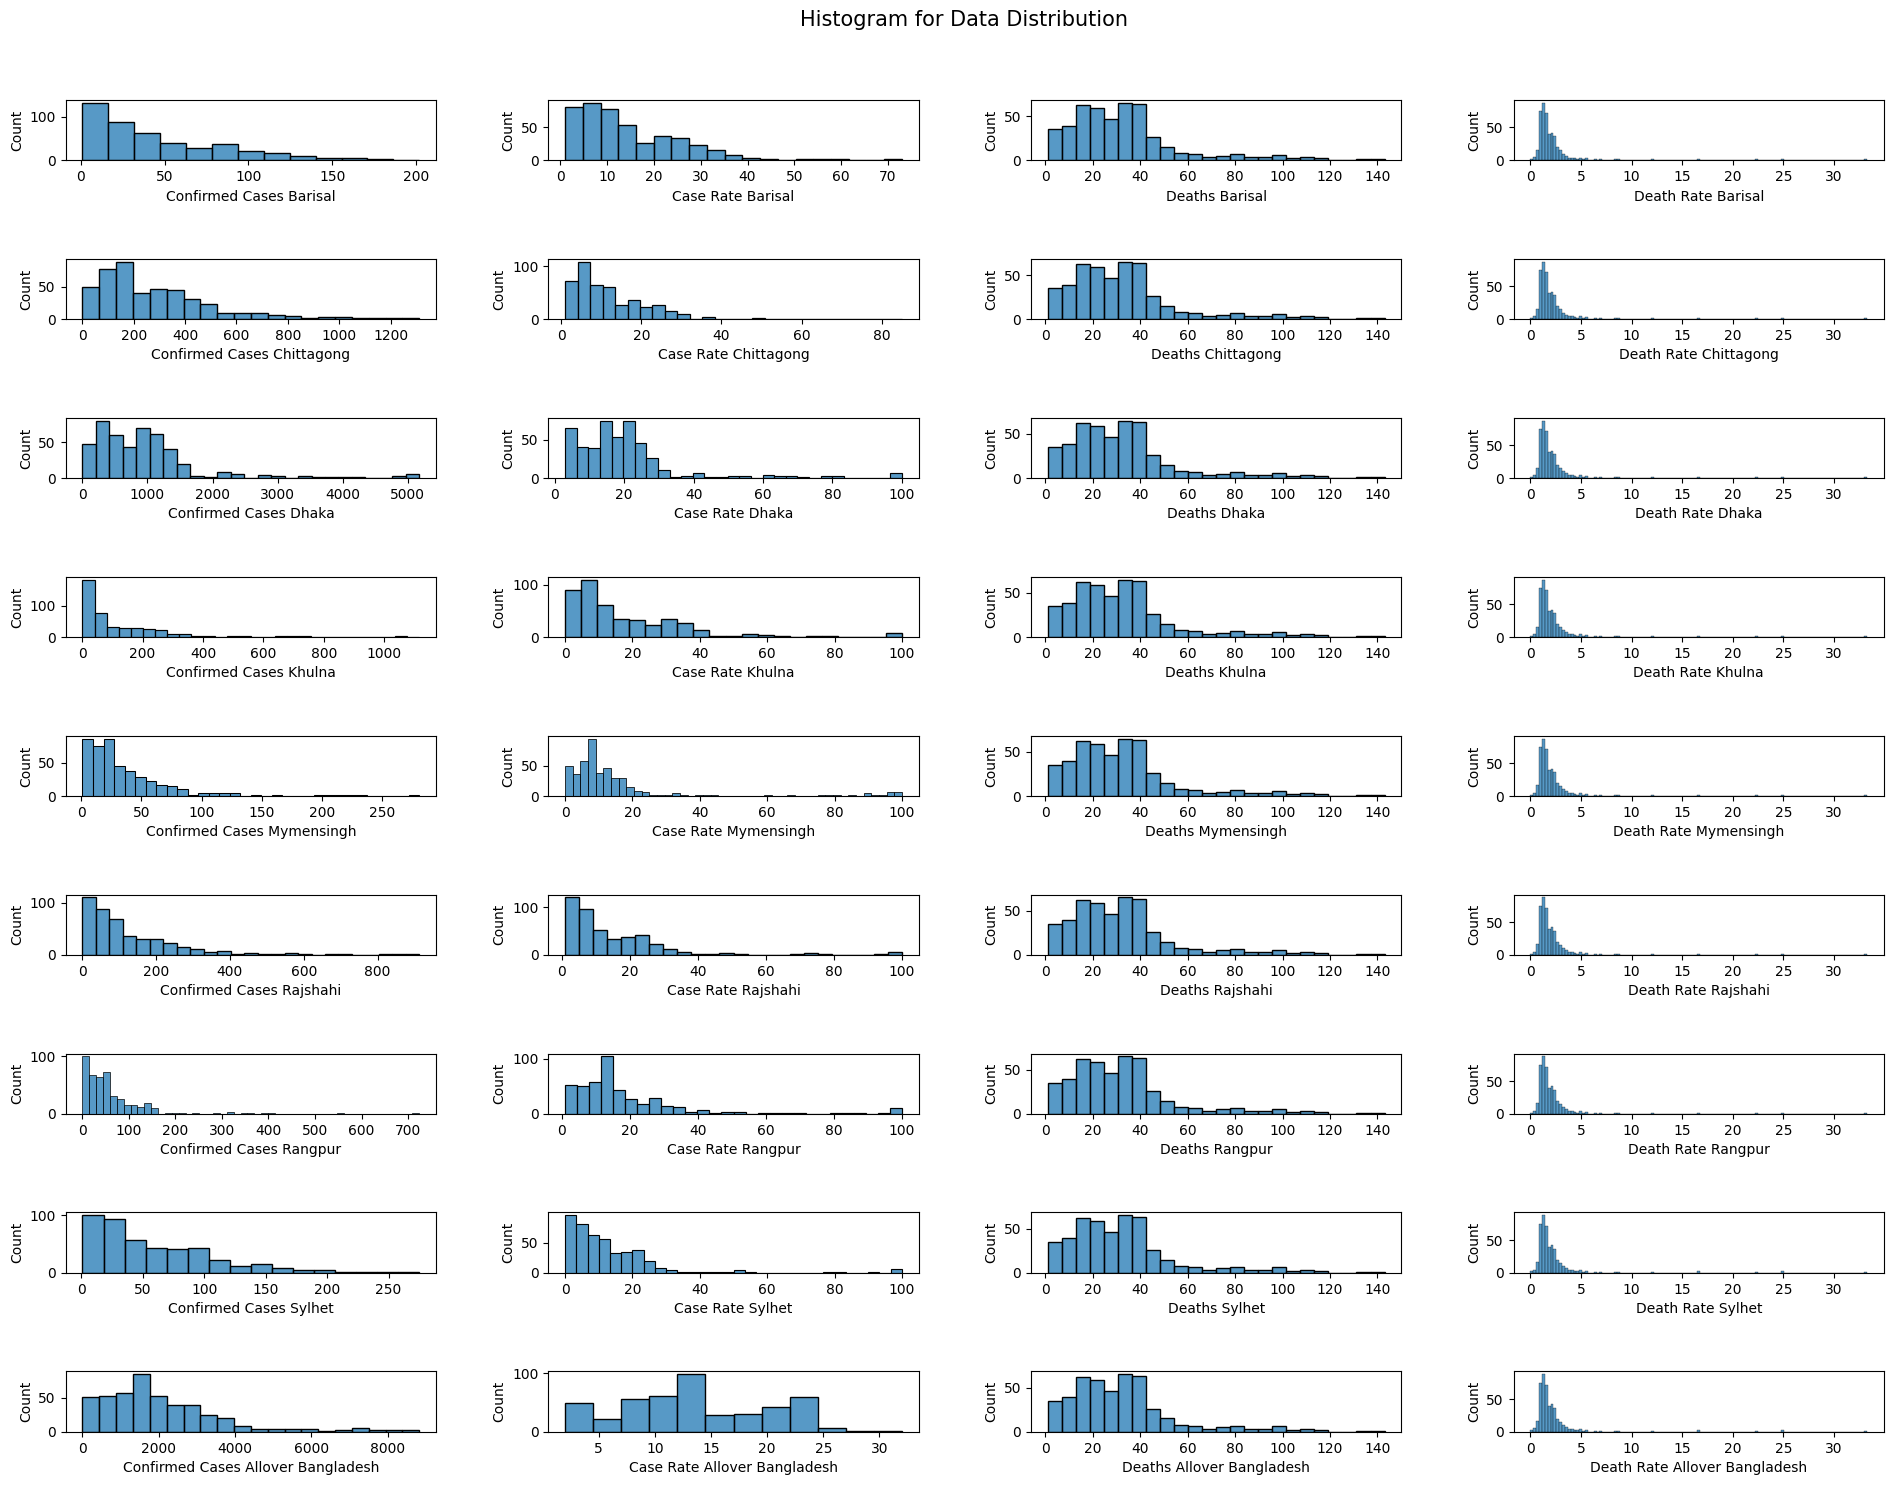

In [27]:
""" histogram for all columns at a single place for quick overview """

# set the number of rows and columns for the grid
rows, cols = 9, 4

# create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
fig.tight_layout(pad=5.0)
fig.suptitle('Histogram for Data Distribution', fontsize=15, y=1.01)

# loop through each column and plot on a different subplot
for i, col in enumerate(covid.select_dtypes(include="number").columns):
    row_pos = i // cols
    col_pos = i % cols
    sns.histplot(data=covid, x=col, ax=axes[row_pos, col_pos])

# remove any empty subplots
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.show()

## Boxplot for identifying outliers

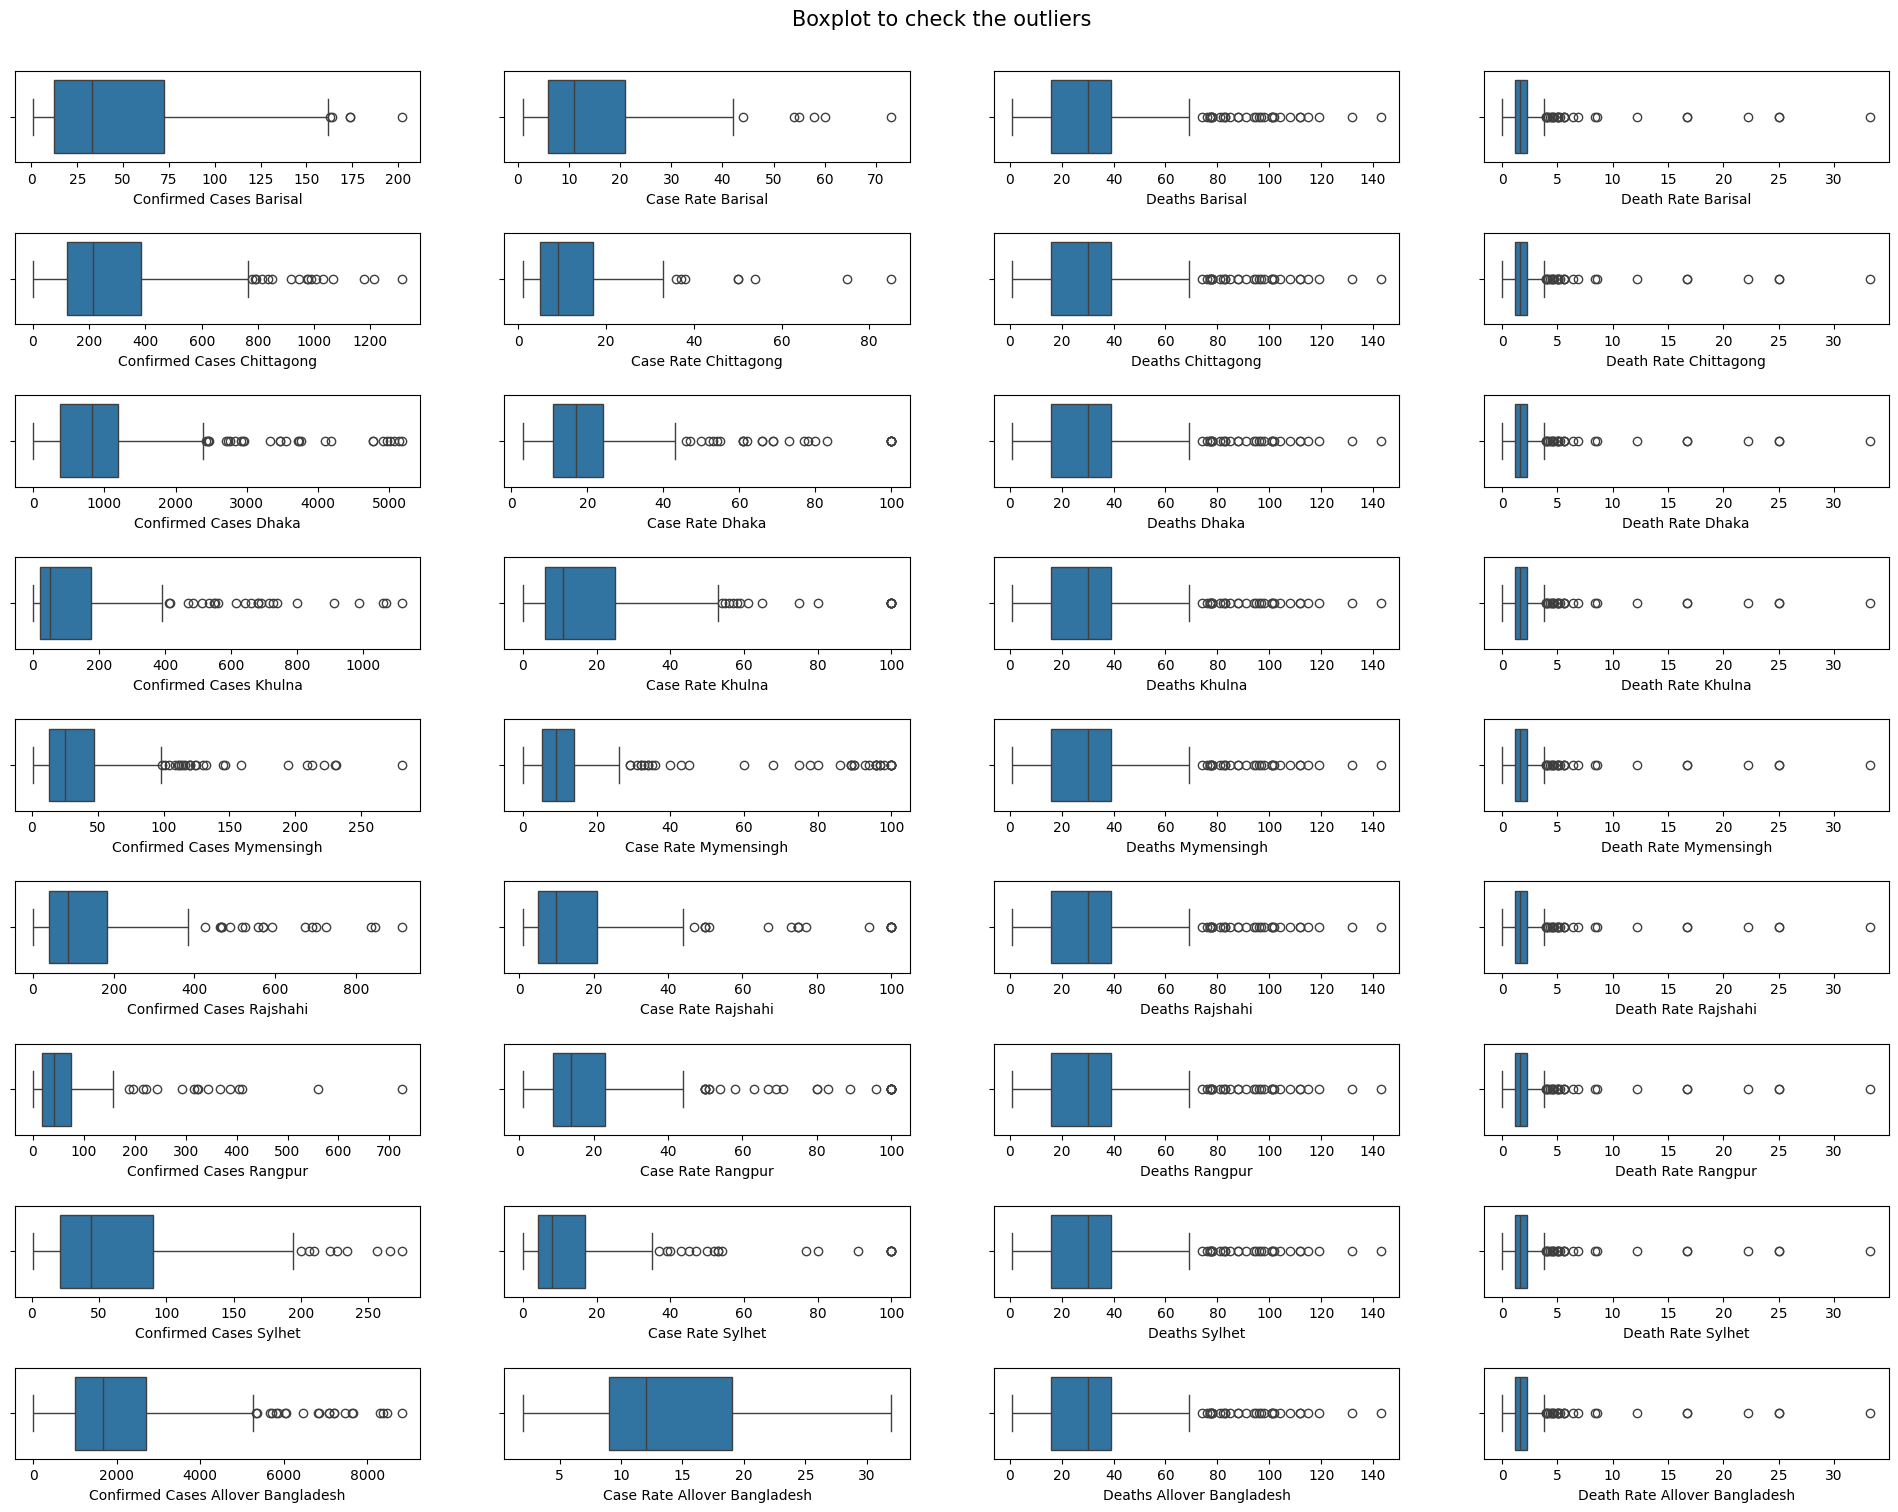

In [28]:
""" boxplot for all columns at a single place for quick overview """

# set the number of rows and columns for the grid
rows, cols = 9, 4

# create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
fig.tight_layout(pad=3.0)
fig.suptitle('Boxplot to check the outliers', fontsize=15, y=1.01)

# loop through each column and plot on a different subplot
for i, col in enumerate(covid.select_dtypes(include="number").columns):
    row_pos = i // cols
    col_pos = i % cols
    sns.boxplot(data=covid, x=col, ax=axes[row_pos, col_pos])
#     axes[row_pos, col_pos].set_title(col)

# remove any empty subplots
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.show()

## Scatter to identify relationships between two numerical variables
1. Plot Confirmed Cases vs Deaths for each division
2. Plot Case Rate vs Death Rate for each division
3. Plot Confirmed Cases vs Case Rate for each division
4. Plot Deaths vs Death Rate for each division

In [29]:
# split columns into two categories
confirmed_cases = [col for col in covid.columns if col.startswith("Confirmed Cases")]
deaths = [col for col in covid.columns if col.startswith("Deaths") and not col.startswith("Death Rate")]
death_rates = [col for col in covid.columns if col.startswith("Death Rate")]
case_rates = [col for col in covid.columns if col.startswith("Case Rate")]

In [30]:
print("Confirmed Cases:", confirmed_cases)
print("Deaths:", deaths)
print("Death Rates:", death_rates)
print("Case Rates:", case_rates)

Confirmed Cases: ['Confirmed Cases Barisal', 'Confirmed Cases Chittagong', 'Confirmed Cases Dhaka', 'Confirmed Cases Khulna', 'Confirmed Cases Mymensingh', 'Confirmed Cases Rajshahi', 'Confirmed Cases Rangpur', 'Confirmed Cases Sylhet', 'Confirmed Cases Allover Bangladesh']
Deaths: ['Deaths Barisal', 'Deaths Chittagong', 'Deaths Dhaka', 'Deaths Khulna', 'Deaths Mymensingh', 'Deaths Rajshahi', 'Deaths Rangpur', 'Deaths Sylhet', 'Deaths Allover Bangladesh']
Death Rates: ['Death Rate Barisal', 'Death Rate Chittagong', 'Death Rate Dhaka', 'Death Rate Khulna', 'Death Rate Mymensingh', 'Death Rate Rajshahi', 'Death Rate Rangpur', 'Death Rate Sylhet', 'Death Rate Allover Bangladesh']
Case Rates: ['Case Rate Barisal', 'Case Rate Chittagong', 'Case Rate Dhaka', 'Case Rate Khulna', 'Case Rate Mymensingh', 'Case Rate Rajshahi', 'Case Rate Rangpur', 'Case Rate Sylhet', 'Case Rate Allover Bangladesh']


### relationship between confirmed case and deaths

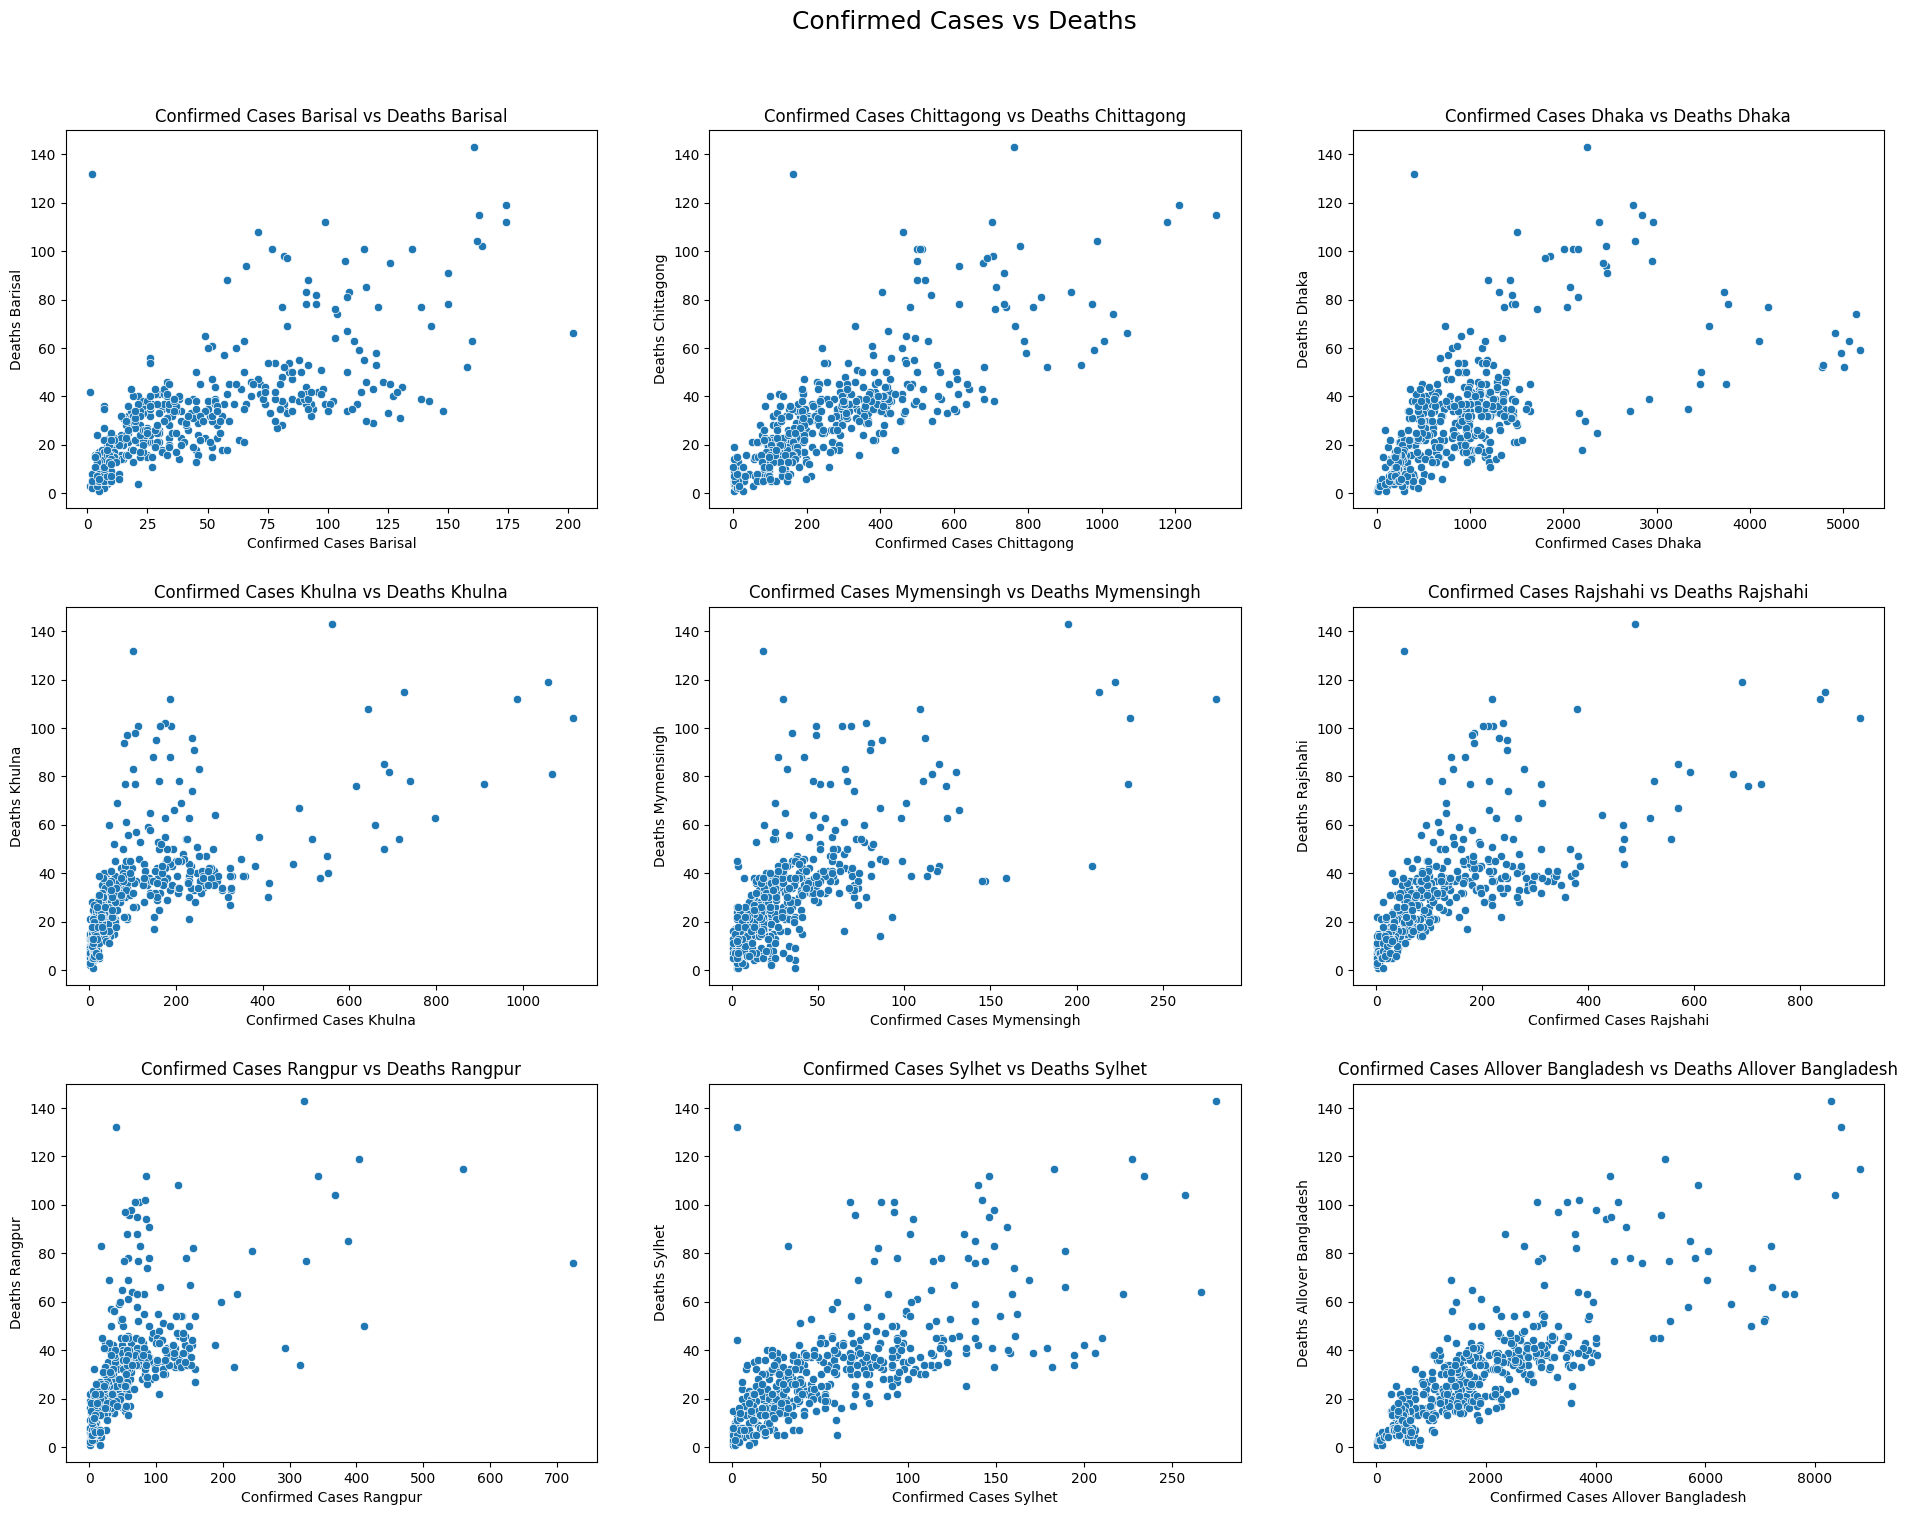

In [31]:
# plot for confirmed cases vs deaths
# Determine number of plots
n_plots = len(confirmed_cases)
cols = 3
rows = math.ceil(n_plots / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()  # Make axes a 1D array for easy indexing
fig.tight_layout(pad=5.0)
fig.suptitle('Confirmed Cases vs Deaths', fontsize=18, y=1.03)

# Plot each pair
for i, (confirm, death) in enumerate(zip(confirmed_cases, deaths)):
    sns.scatterplot(data=covid, x=confirm, y=death, ax=axes[i])
    axes[i].set_title(f"{confirm} vs {death}")

# Hide unused subplots
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

plt.show()

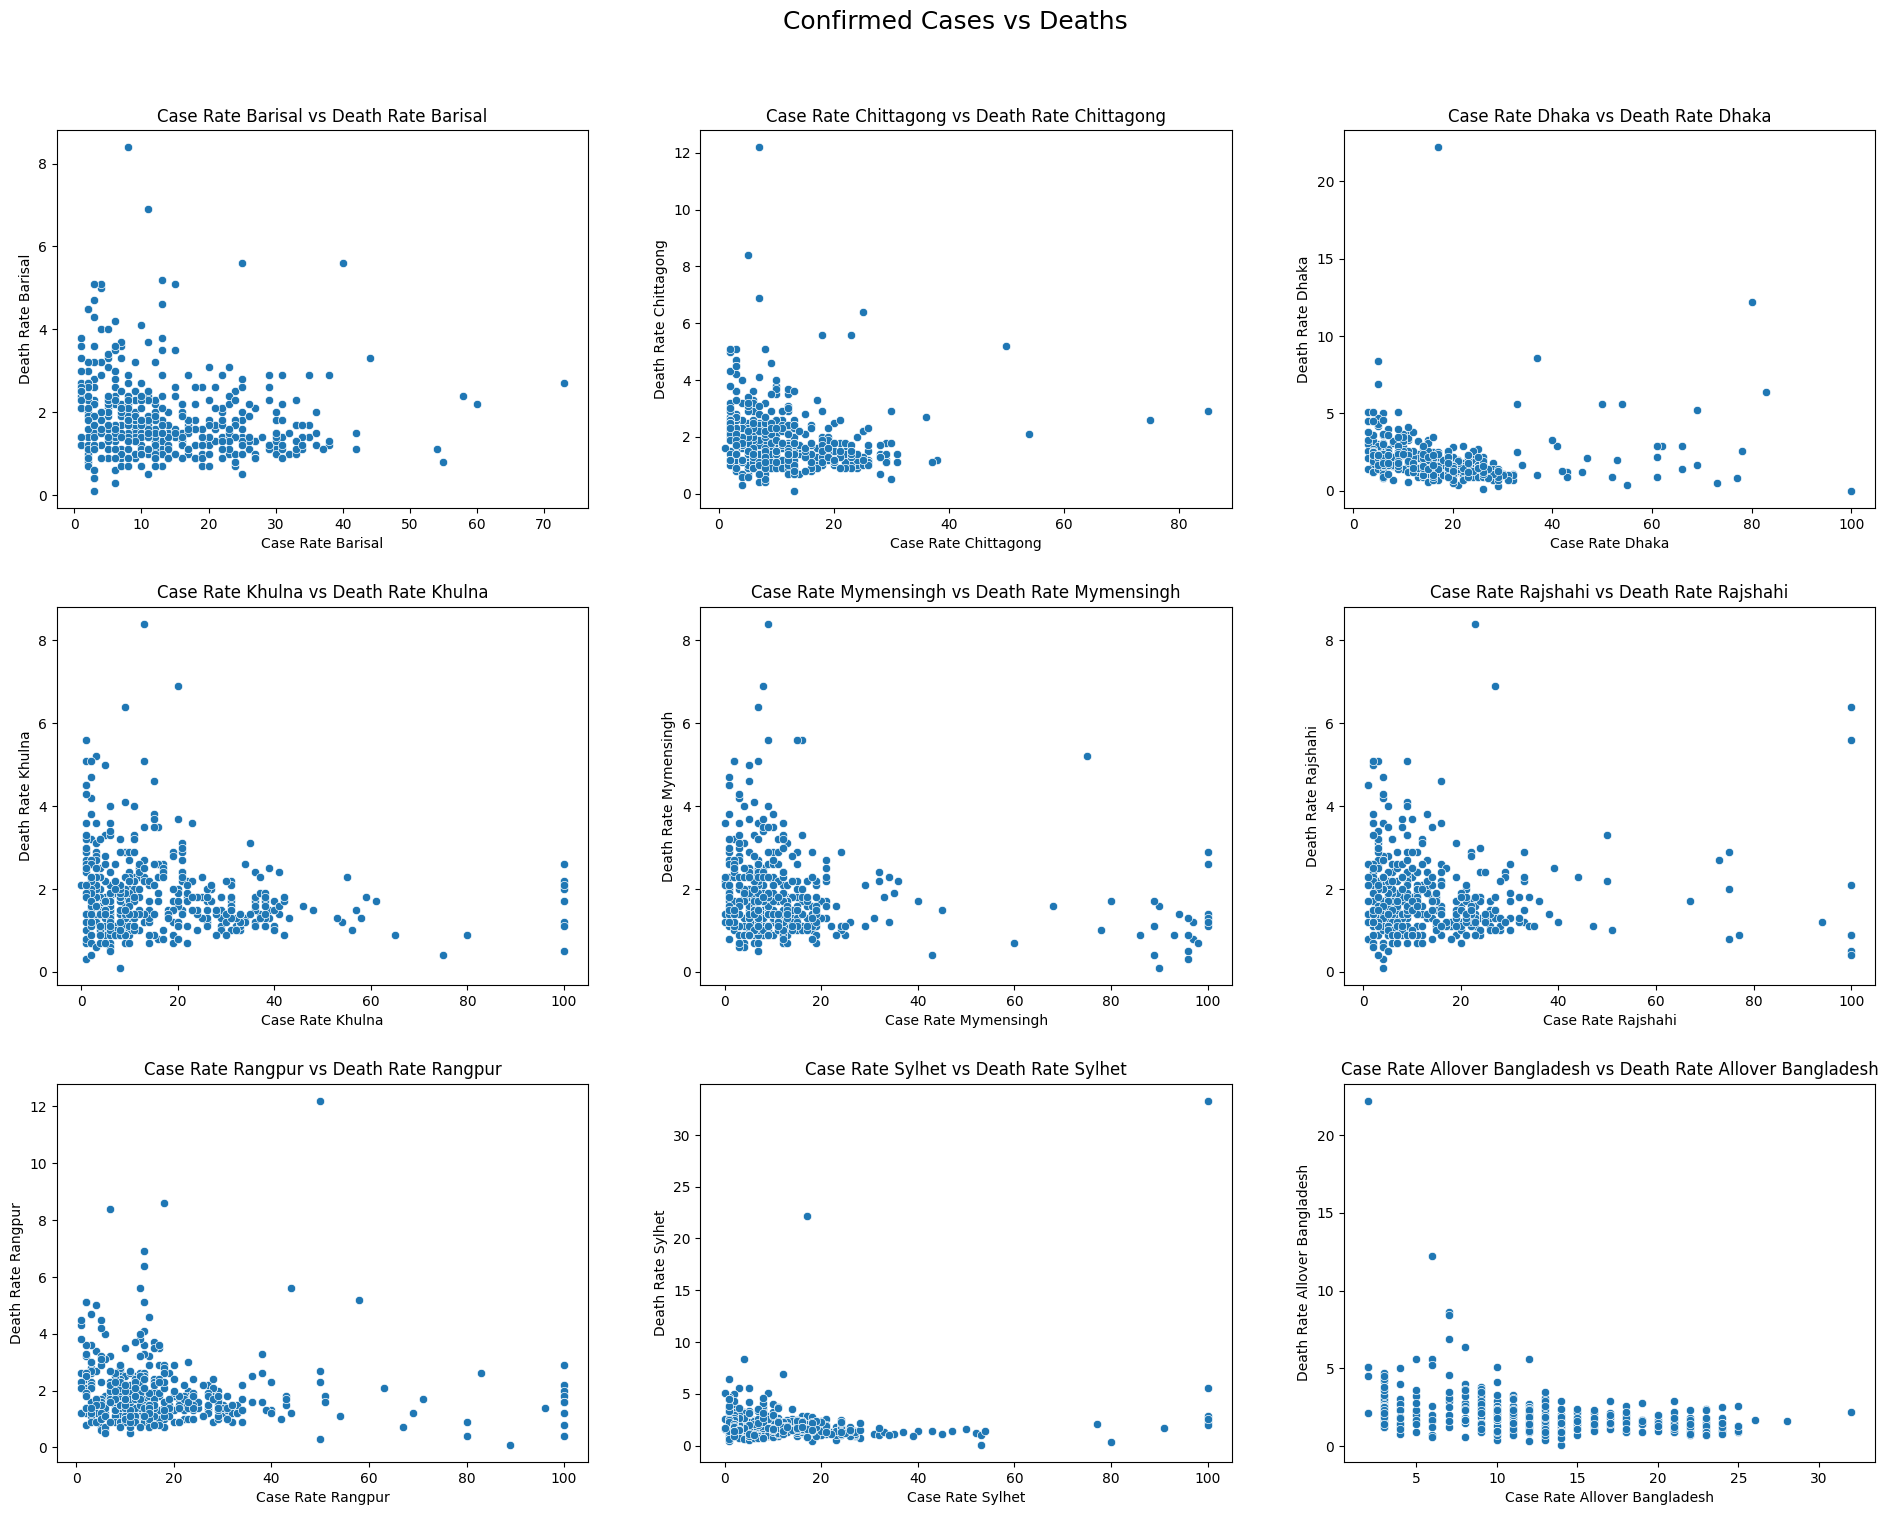

In [32]:
# plot for case rate vs death rate
# Determine number of plots
n_plots = len(case_rates)
cols = 3
rows = math.ceil(n_plots / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()  # Make axes a 1D array for easy indexing
fig.tight_layout(pad=5.0)
fig.suptitle('Confirmed Cases vs Deaths', fontsize=18, y=1.03)

# Plot each pair
for i, (case, death) in enumerate(zip(case_rates, death_rates)):
    sns.scatterplot(data=covid, x=case, y=death, ax=axes[i])
    axes[i].set_title(f"{case} vs {death}")

# Hide unused subplots
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

plt.show()

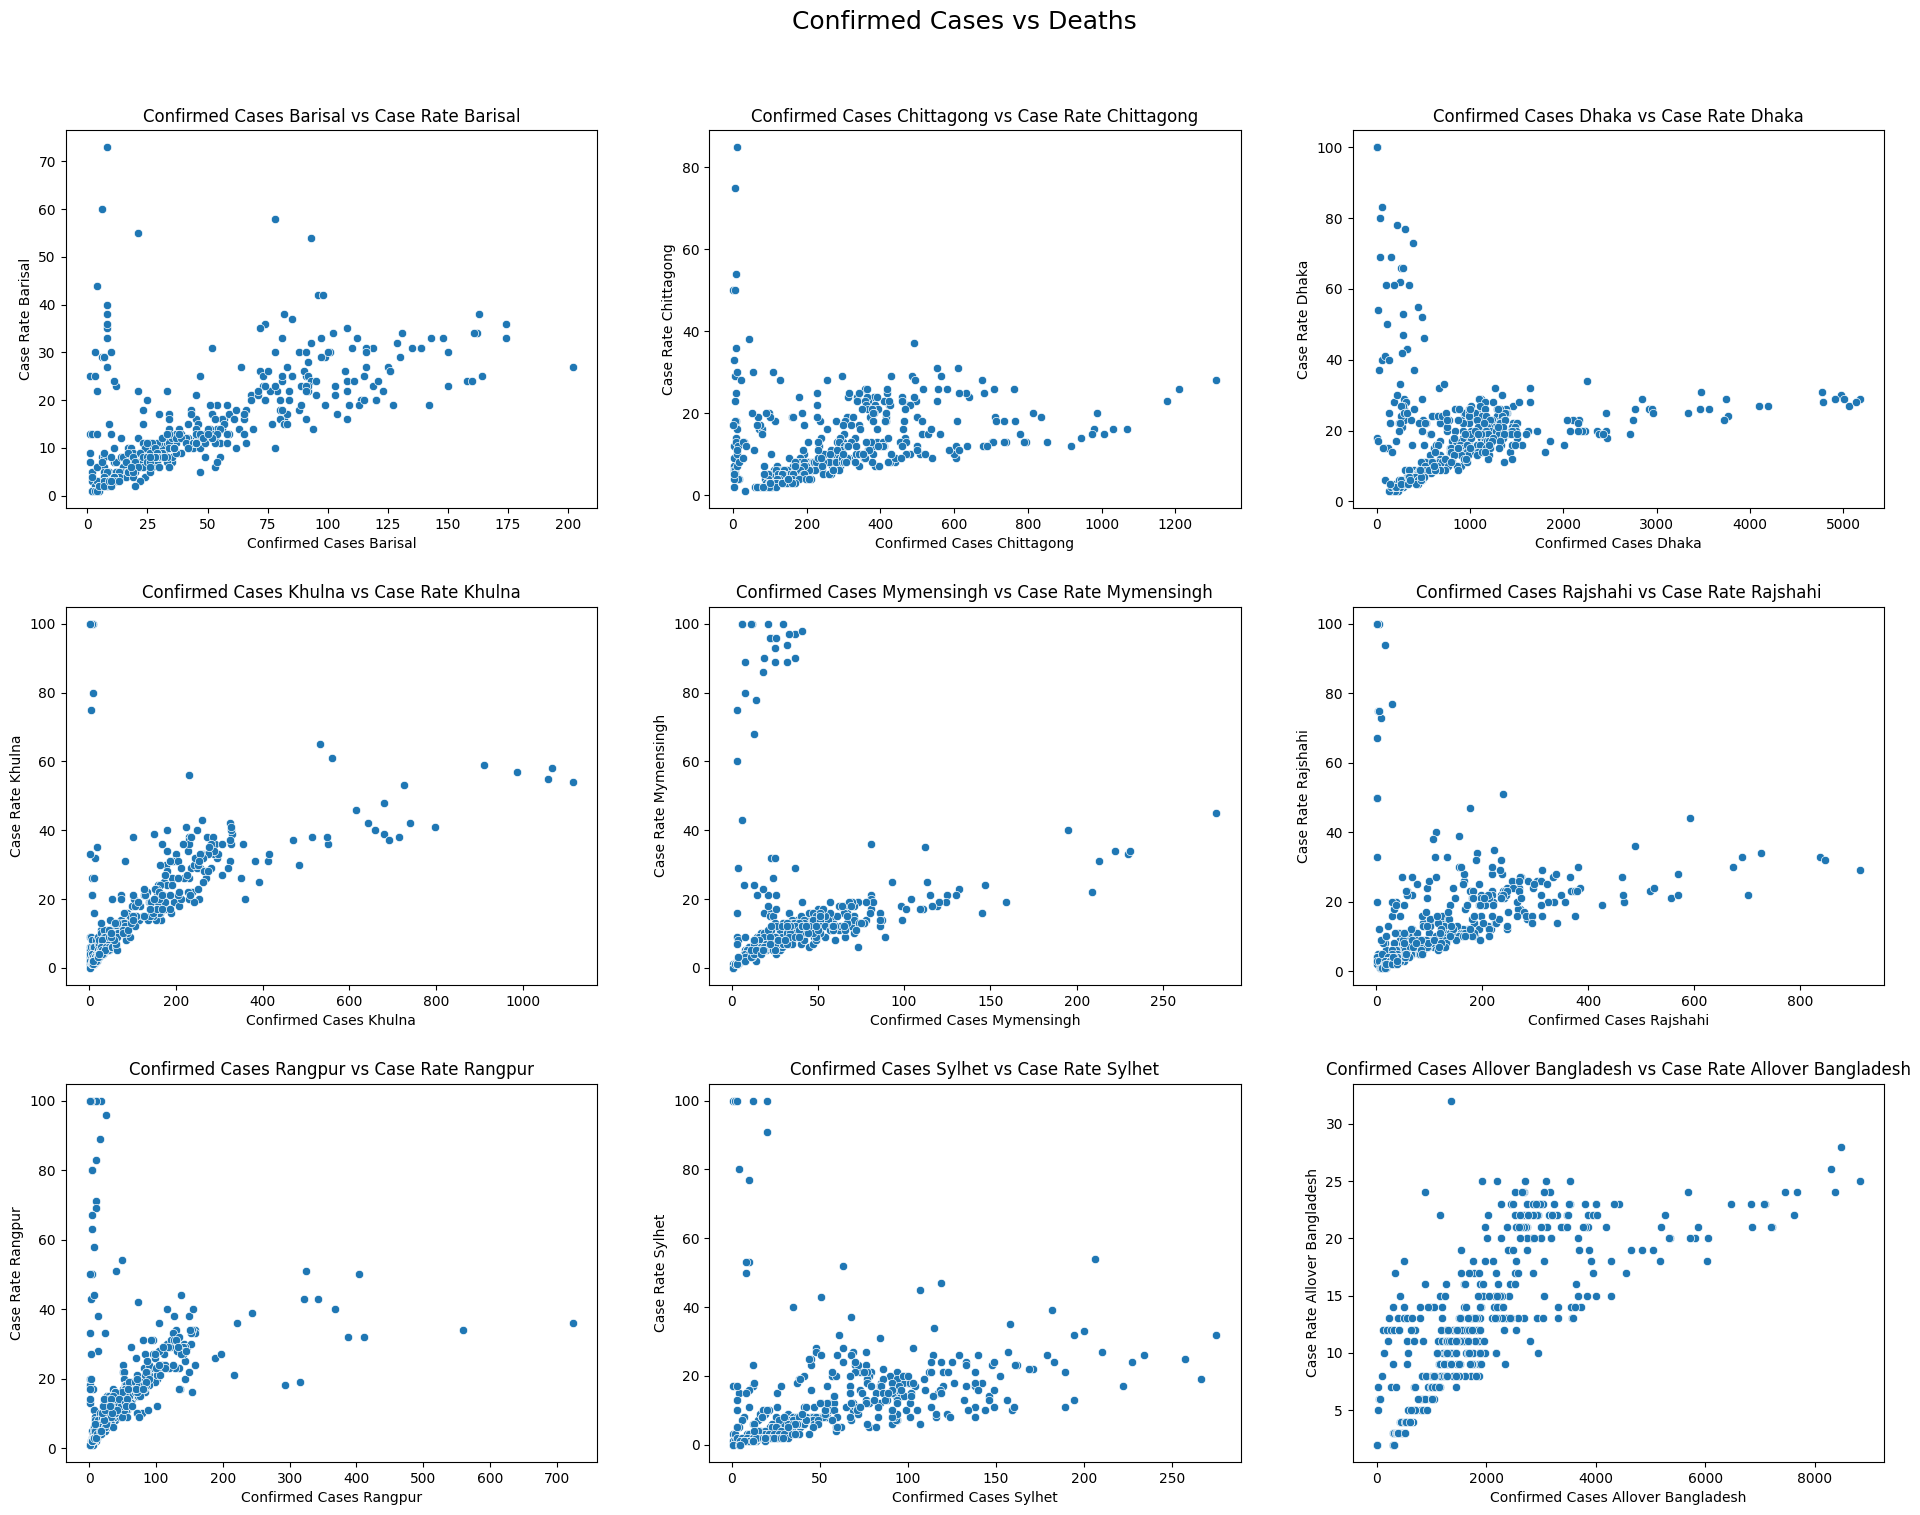

In [33]:
# plot for confirmed case vs case rate
# Determine number of plots
n_plots = len(confirmed_cases)
cols = 3
rows = math.ceil(n_plots / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()  # Make axes a 1D array for easy indexing
fig.tight_layout(pad=5.0)
fig.suptitle('Confirmed Cases vs Deaths', fontsize=18, y=1.03)

# Plot each pair
for i, (confirm, case) in enumerate(zip(confirmed_cases, case_rates)):
    sns.scatterplot(data=covid, x=confirm, y=case, ax=axes[i])
    axes[i].set_title(f"{confirm} vs {case}")

# Hide unused subplots
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

plt.show()

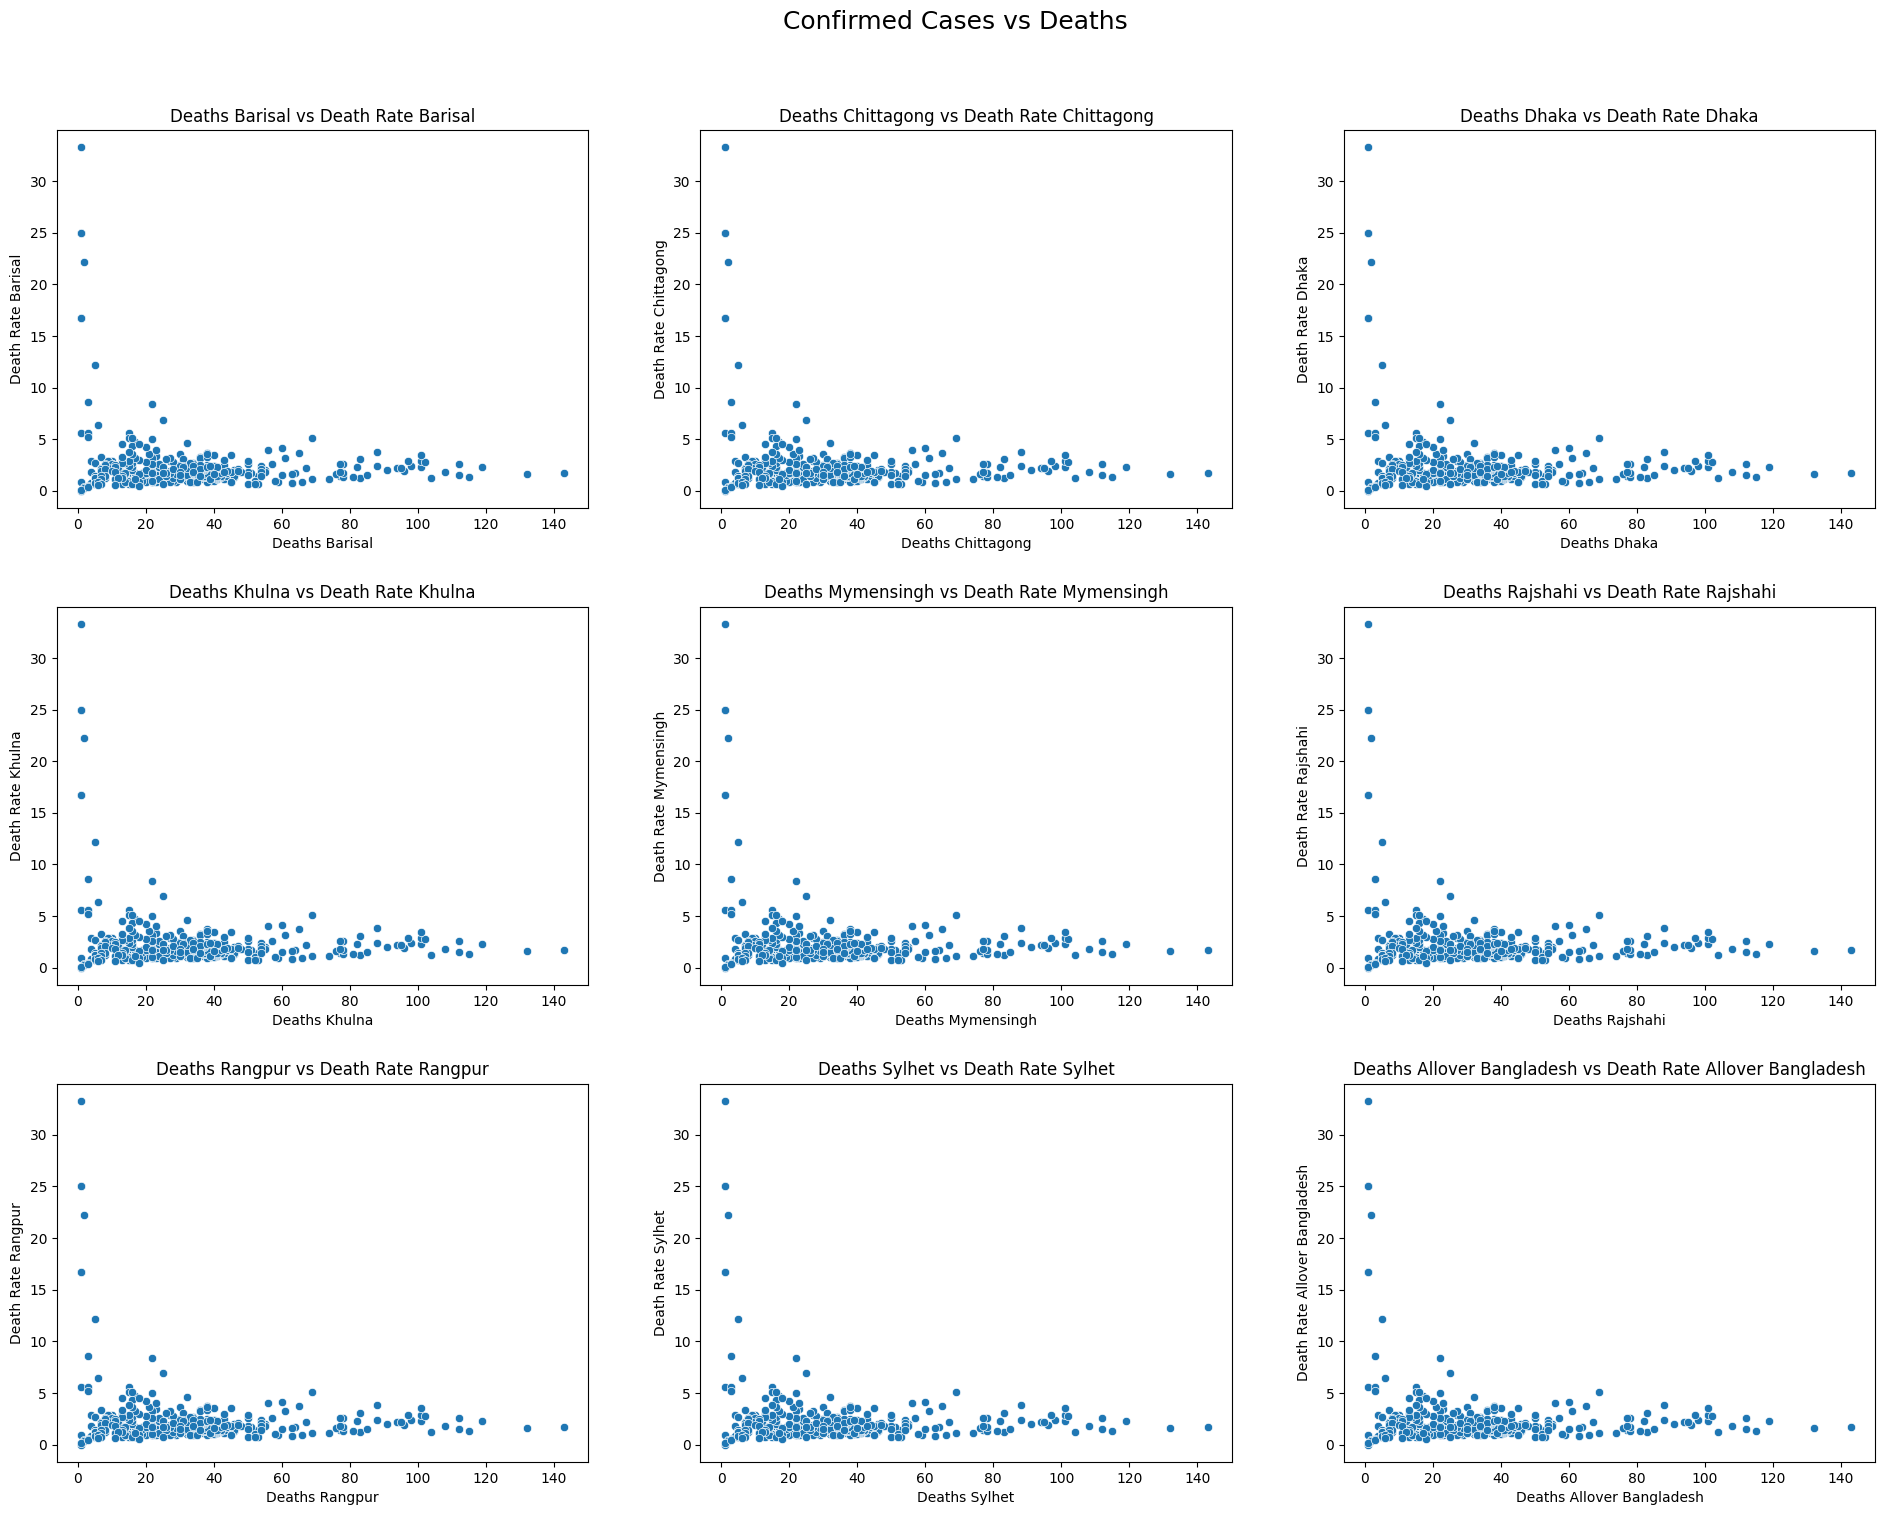

In [34]:
# plot for deaths case vs deaths rate
# Determine number of plots
n_plots = len(deaths)
cols = 3
rows = math.ceil(n_plots / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()  # Make axes a 1D array for easy indexing
fig.tight_layout(pad=5.0)
fig.suptitle('Confirmed Cases vs Deaths', fontsize=18, y=1.03)

# Plot each pair
for i, (cases, rate) in enumerate(zip(deaths, death_rates)):
    sns.scatterplot(data=covid, x=cases, y=rate, ax=axes[i])
    axes[i].set_title(f"{cases} vs {rate}")

# Hide unused subplots
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

plt.show()

## Handling Missing Value

### Observation (According to Histogram)
1. Most columns are right-skewed, meaning the majority of the data is concentrated toward the lower end (left side), and there's a long tail to the right.
2. In many histograms, there's a large spike at 0, which likely reflects your NaN-filled-with-zero strategy.
3. Some histograms show discrete steps, indicating categorical-like or integer-discrete data.

### Decision
If the missing values truly represent the absence of cases or deaths (indicates case recorded), we can fill the missing values with 0. But filling missing values with 0 will distorts the analysis if the column indicates the ratio / rate.

### Action
- fill columns like Confirmed cases or Deaths, where 0 = no event.
- Use interpolation for smoother trends in rate columns (Case rate, Death rate). 

In [36]:
# Interpolate missing values for numeric columns
# Fill NaN values in "Rate" columns with linear interpolation
for col in covid.columns:
    if col == "Date":
        continue                                                        # Skip the "Date" column

    elif "Rate" in col:
        covid[col] = covid[col].interpolate(method='linear')            # Check if the column is numeric and contains "Rate"
    
    else:
        covid[col] = covid[col].fillna(0)                               # For other numeric columns, fill NaN with 0

In [37]:
# checking missing value imputation
covid.isnull().any()

Date                                  False
Confirmed Cases Barisal               False
Case Rate Barisal                     False
Deaths Barisal                        False
Death Rate Barisal                     True
Confirmed Cases Chittagong            False
Case Rate Chittagong                   True
Deaths Chittagong                     False
Death Rate Chittagong                  True
Confirmed Cases Dhaka                 False
Case Rate Dhaka                       False
Deaths Dhaka                          False
Death Rate Dhaka                       True
Confirmed Cases Khulna                False
Case Rate Khulna                       True
Deaths Khulna                         False
Death Rate Khulna                      True
Confirmed Cases Mymensingh            False
Case Rate Mymensingh                   True
Deaths Mymensingh                     False
Death Rate Mymensingh                  True
Confirmed Cases Rajshahi              False
Case Rate Rajshahi              

In [39]:
covid.isnull().sum()

Date                                   0
Confirmed Cases Barisal                0
Case Rate Barisal                      0
Deaths Barisal                         0
Death Rate Barisal                     3
Confirmed Cases Chittagong             0
Case Rate Chittagong                   1
Deaths Chittagong                      0
Death Rate Chittagong                  3
Confirmed Cases Dhaka                  0
Case Rate Dhaka                        0
Deaths Dhaka                           0
Death Rate Dhaka                       3
Confirmed Cases Khulna                 0
Case Rate Khulna                      22
Deaths Khulna                          0
Death Rate Khulna                      3
Confirmed Cases Mymensingh             0
Case Rate Mymensingh                  17
Deaths Mymensingh                      0
Death Rate Mymensingh                  3
Confirmed Cases Rajshahi               0
Case Rate Rajshahi                     1
Deaths Rajshahi                        0
Death Rate Rajsh

In [40]:
covid

,Date,Confirmed Cases Barisal,Case Rate Barisal,Deaths Barisal,Death Rate Barisal,Confirmed Cases Chittagong,Case Rate Chittagong,Deaths Chittagong,Death Rate Chittagong,Confirmed Cases Dhaka,...,Deaths Rangpur,Death Rate Rangpur,Confirmed Cases Sylhet,Case Rate Sylhet,Deaths Sylhet,Death Rate Sylhet,Confirmed Cases Allover Bangladesh,Case Rate Allover Bangladesh,Deaths Allover Bangladesh,Death Rate Allover Bangladesh
0,2020-03-06,1,7.0,0,NaN,0,<NA>,0,NaN,3,...,0,NaN,0,<NA>,0,NaN,0,<NA>,0,NaN
1,2020-03-08,1,13.0,0,NaN,1,50.0,0,NaN,55,...,0,NaN,0,<NA>,0,NaN,0,<NA>,0,NaN
2,2020-03-09,0,13.631579,0,NaN,2,33.0,0,NaN,0,...,0,NaN,0,<NA>,0,NaN,0,<NA>,0,NaN
3,2020-03-18,0,14.263158,1,25.0,0,31.470588,1,25.0,0,...,1,25.0,0,<NA>,1,25.0,0,<NA>,1,25.0
4,2020-03-19,0,14.894737,0,25.0,0,29.941176,0,25.0,1,...,0,25.0,0,<NA>,0,25.0,0,<NA>,0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,2021-06-28,162,34.0,104,1.2,988,20.0,104,1.2,2768,...,104,1.2,257,25.0,104,1.2,8364,24.0,104,1.2
467,2021-06-29,174,36.0,112,1.5,1177,23.0,112,1.5,2958,...,112,1.5,234,26.0,112,1.5,7666,24.0,112,1.5
468,2021-06-30,163,38.0,115,1.3,1311,28.0,115,1.3,2843,...,115,1.3,183,24.0,115,1.3,8822,25.0,115,1.3
469,2021-07-01,161,34.0,143,1.7,761,26.0,143,1.7,2253,...,143,1.7,275,32.0,143,1.7,8301,26.0,143,1.7
